In [101]:
import matplotlib.pyplot as plt

from arguseyes import ArgusEyes
from arguseyes.refinements import DataValuation

In [102]:
eyes = ArgusEyes('demo', '../../mlruns')

In [103]:
with eyes.classification_pipeline_from_py_file('sneakers.py') as pipeline:
    
    train_source_with_shapley_values = pipeline.compute(DataValuation())

/home/ssc/Entwicklung/projects/arguseyes/venv/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8/8 [==============================] - 0s 5ms/step - loss: 0.2015 - accuracy: 0.9076


In [104]:
valued_samples = train_source_with_shapley_values.data

### Find the five least valuable samples

In [105]:
valued_samples.sort_values(by='__arguseyes__shapley_value').head(5)

,image,category_id,mlinspect_lineage,__arguseyes__shapley_value
3756,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,"{LineageId(operator_id=0, row_id=3756)}",-0.005976
445,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{LineageId(operator_id=0, row_id=445)}",-0.004510
1639,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,"{LineageId(operator_id=0, row_id=1639)}",-0.003280
553,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{LineageId(operator_id=0, row_id=553)}",-0.002536
2263,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{LineageId(operator_id=0, row_id=2263)}",-0.002093


### The least valuable sample is a sneaker that looks a lot like an ankle boot ;)

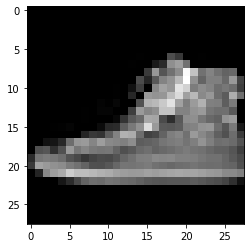

In [107]:
img = valued_samples.loc[3756, 'image'].reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

## The five most valuable samples

In [108]:
valued_samples.sort_values(by='__arguseyes__shapley_value', ascending=False).head(5)

,image,category_id,mlinspect_lineage,__arguseyes__shapley_value
503,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{LineageId(operator_id=0, row_id=503)}",0.002706
557,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{LineageId(operator_id=0, row_id=557)}",0.002539
898,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{LineageId(operator_id=0, row_id=898)}",0.002495
3290,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{LineageId(operator_id=0, row_id=3290)}",0.002492
1111,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{LineageId(operator_id=0, row_id=1111)}",0.002431


### The most valuable sample seems to be a prototypical ankle boot

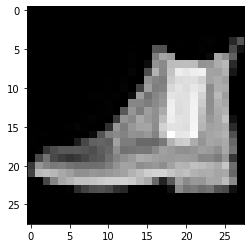

In [109]:
img = valued_samples.loc[503, 'image'].reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()